# Ironhack_week5_project: Anime Recommendation Database 2020

Import the necessary libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import date
from datetime import datetime
from datetime import timedelta

Visualize the database "anime.csv"

In [2]:
data = pd.read_csv('data/anime.csv')
data.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


I want to drop all the last columns Score- because there columns are already from aggregations that I will not need now. I will also drop the column japanese_name because it´s not informative.

In [3]:
data1 = data[data.columns.drop(list(data.filter(regex='Score-')))]
data1=data1.drop(['Japanese name'], axis=1)

display(data1.head(2))
data1.shape

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,...,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,...,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",...,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964


(17562, 24)

I will reset the index:

In [4]:
data1.reset_index(drop=True)
data1.head(2)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,...,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,...,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",...,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964


I will uniform the column-titles. 

In [5]:
new_header = []
def change_titels(df):
    for i in df.columns:
        x = i.lower().replace(' ','_')
        new_header.append(x)
    df.columns = new_header
    display(df.head(2))
    
change_titels(data1)

,mal_id,name,score,genres,english_name,type,episodes,aired,premiered,producers,...,rating,ranked,popularity,members,favorites,watching,completed,on-hold,dropped,plan_to_watch
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,...,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",...,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mal_id         17562 non-null  int64 
 1   name           17562 non-null  object
 2   score          17562 non-null  object
 3   genres         17562 non-null  object
 4   english_name   17562 non-null  object
 5   type           17562 non-null  object
 6   episodes       17562 non-null  object
 7   aired          17562 non-null  object
 8   premiered      17562 non-null  object
 9   producers      17562 non-null  object
 10  licensors      17562 non-null  object
 11  studios        17562 non-null  object
 12  source         17562 non-null  object
 13  duration       17562 non-null  object
 14  rating         17562 non-null  object
 15  ranked         17562 non-null  object
 16  popularity     17562 non-null  int64 
 17  members        17562 non-null  int64 
 18  favorites      17562 non-n

In [7]:
#remember to convert score,episodes,duration,rating,ranked as numerical if needed.

In [8]:
data1['episodes'].unique()
#data1['episodes'].isna().sum()
data1['episodes'][11]

'Unknown'

In [9]:
#Thake out 'Unknown' before converting in numerical

In [10]:
data1.drop(data1[data1['episodes'] == 'Unknown'].index, inplace = True)
data1 = pd.DataFrame(data=data1)
data1['episodes'].unique()

array(['26', '1', '52', '145', '24', '74', '220', '178', '12', '22', '69',
       '25', '4', '94', '5', '3', '13', '23', '43', '6', '50', '47', '51',
       '49', '39', '8', '7', '75', '62', '14', '44', '45', '64', '101',
       '27', '161', '2', '153', '70', '78', '42', '11', '167', '150',
       '366', '9', '16', '38', '48', '10', '76', '40', '20', '37', '41',
       '112', '224', '180', '296', '358', '63', '276', '46', '54', '15',
       '21', '35', '124', '86', '102', '36', '67', '291', '110', '29',
       '55', '201', '142', '109', '34', '136', '32', '73', '114', '19',
       '195', '58', '155', '96', '103', '113', '104', '192', '191', '203',
       '56', '500', '80', '172', '65', '117', '28', '61', '30', '148',
       '128', '100', '17', '243', '92', '105', '79', '31', '1787', '53',
       '33', '130', '18', '97', '193', '115', '170', '66', '330', '108',
       '68', '119', '95', '137', '60', '77', '72', '127', '99', '373',
       '300', '163', '91', '88', '154', '156', '694', '8

In [11]:
data1['episodes'] = pd.to_numeric(data1['episodes'])
data1.dtypes

mal_id            int64
name             object
score            object
genres           object
english_name     object
type             object
episodes          int64
aired            object
premiered        object
producers        object
licensors        object
studios          object
source           object
duration         object
rating           object
ranked           object
popularity        int64
members           int64
favorites         int64
watching          int64
completed         int64
on-hold           int64
dropped           int64
plan_to_watch     int64
dtype: object

Check for NaN values. 

In [12]:
data1.isna().sum()

mal_id           0
name             0
score            0
genres           0
english_name     0
type             0
episodes         0
aired            0
premiered        0
producers        0
licensors        0
studios          0
source           0
duration         0
rating           0
ranked           0
popularity       0
members          0
favorites        0
watching         0
completed        0
on-hold          0
dropped          0
plan_to_watch    0
dtype: int64

There are no NaN values in data1.

# 1. Which is the years during which the 10 most favorite animes were aired?

In [13]:
data1[['aired']]

,aired
0,"Apr 3, 1998 to Apr 24, 1999"
1,"Sep 1, 2001"
2,"Apr 1, 1998 to Sep 30, 1998"
3,"Jul 2, 2002 to Dec 24, 2002"
4,"Sep 30, 2004 to Sep 29, 2005"
...,...
17547,Unknown
17548,"Jan 18, 2021"
17549,"Sep 10, 2021 to ?"
17552,"Mar 14, 2021"


in the column aired there is a lot of etherogeneity in the columns value. I will try to organize this column in this way:

-clean the aired column
-make two columns for "aired_start" and "aired_stop"
-delate the "aired" original column
-check for NaN value and unusual values. Clean the columns from these values.
-make the two new columns as date type and select the years for "aired_start" and "aired_stop"

In [14]:
data1[['aired']].value_counts()

aired                       
Unknown                         183
2005                             57
2004                             49
2003                             46
2006                             45
                               ... 
Jan 10, 2005 to Dec 26, 2005      1
Jan 10, 2005 to Jun 27, 2005      1
Jan 10, 2005 to Mar 28, 2005      1
Jan 10, 2006 to Mar 28, 2006      1
Jul 22, 2017 to Jan 20, 2018      1
Length: 11738, dtype: int64

1-clean the aired column from Unkown values.

In [15]:
data1['airedUnknown']=data1[['aired']]=='Unknown'
data1[['airedUnknown']]
data1.head(2)

,mal_id,name,score,genres,english_name,type,episodes,aired,premiered,producers,...,ranked,popularity,members,favorites,watching,completed,on-hold,dropped,plan_to_watch,airedUnknown
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,...,28.0,39,1251960,61971,105808,718161,71513,26678,329800,False
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",...,159.0,518,273145,1174,4143,208333,1935,770,57964,False


In [16]:
data1.drop(data1[data1['airedUnknown'] == True].index, inplace = True)
data2 = pd.DataFrame(data=data1)

In [17]:
#pd.set_option('display.max_rows', None)

In [18]:
data2[['aired']].value_counts()

aired                       
2005                            57
2004                            49
2003                            46
2006                            45
2008                            44
                                ..
Jan 10, 2005 to Dec 26, 2005     1
Jan 10, 2005 to Jun 27, 2005     1
Jan 10, 2005 to Mar 28, 2005     1
Jan 10, 2006 to Mar 28, 2006     1
Sep, 2019                        1
Length: 11737, dtype: int64

2-make two columns for "aired_start" and "aired_stop" from the column "aired". 

In [19]:
# new data frame with split value columns
new = data2["aired"].str.split("to", n = 1, expand = True)
# making separate first name column from new data frame
data2['aired_start']= new[0]
# making separate last name column from new data frame
data2["aired_stop"]= new[1]

In [20]:
data2[['aired', 'aired_start',"aired_stop"]]

,aired,aired_start,aired_stop
0,"Apr 3, 1998 to Apr 24, 1999","Apr 3, 1998","Apr 24, 1999"
1,"Sep 1, 2001","Sep 1, 2001",None
2,"Apr 1, 1998 to Sep 30, 1998","Apr 1, 1998","Sep 30, 1998"
3,"Jul 2, 2002 to Dec 24, 2002","Jul 2, 2002","Dec 24, 2002"
4,"Sep 30, 2004 to Sep 29, 2005","Sep 30, 2004","Sep 29, 2005"
...,...,...,...
17538,"Mar 13, 2021 to Mar 15, 2021","Mar 13, 2021","Mar 15, 2021"
17548,"Jan 18, 2021","Jan 18, 2021",None
17549,"Sep 10, 2021 to ?","Sep 10, 2021",?
17552,"Mar 14, 2021","Mar 14, 2021",None


Drop the column "aired"

In [21]:
data2=data2.drop(['aired'], axis=1)
data2.head()

,mal_id,name,score,genres,english_name,type,episodes,premiered,producers,licensors,...,members,favorites,watching,completed,on-hold,dropped,plan_to_watch,airedUnknown,aired_start,aired_stop
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",...,1251960,61971,105808,718161,71513,26678,329800,False,"Apr 3, 1998","Apr 24, 1999"
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,...,273145,1174,4143,208333,1935,770,57964,False,"Sep 1, 2001",None
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",...,558913,12944,29113,343492,25465,13925,146918,False,"Apr 1, 1998","Sep 30, 1998"
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",...,94683,587,4300,46165,5121,5378,33719,False,"Jul 2, 2002","Dec 24, 2002"
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Fall 2004,"TV Tokyo, Dentsu",Unknown,...,13224,18,642,7314,766,1108,3394,False,"Sep 30, 2004","Sep 29, 2005"


Check for NaN values 

In [22]:
data2['aired_start'].value_counts()
data2['aired_start'].isna().sum()

0

In [23]:
data2['aired_stop'].value_counts()
data2['aired_stop'].isna().sum()

8787

"aired_stop" has a lot and I will drop the rows with NaN values relative to aired_stop. 

In [24]:
data4 = data2[data2['aired_stop'].isna() == False]
data4['aired_stop'].isna().sum()

0

In [25]:
data4[['aired_start',"aired_stop"]]

,aired_start,aired_stop
0,"Apr 3, 1998","Apr 24, 1999"
2,"Apr 1, 1998","Sep 30, 1998"
3,"Jul 2, 2002","Dec 24, 2002"
4,"Sep 30, 2004","Sep 29, 2005"
5,"Apr 6, 2005","Mar 19, 2008"
...,...,...
17532,"Feb 25, 2021","Jun 10, 2021"
17533,"Feb 3, 2021","Apr 14, 2021"
17538,"Mar 13, 2021","Mar 15, 2021"
17549,"Sep 10, 2021",?


I want to remouve the rows that has a "?" like 17561. They use the ? probaby because the anime is still aired. So I can either exlude this value dropping the rows with ? or substitute the ? with the date of today. I will do the second one. 

In [26]:
def money(text):
    return text.replace(" ?", "May 30, 2022")

data4 = data4.copy()
for col in data4.columns:
    data4['aired_stop'] = data4['aired_stop'].apply(money)
    

data4[['aired_start',"aired_stop"]]

,aired_start,aired_stop
0,"Apr 3, 1998","Apr 24, 1999"
2,"Apr 1, 1998","Sep 30, 1998"
3,"Jul 2, 2002","Dec 24, 2002"
4,"Sep 30, 2004","Sep 29, 2005"
5,"Apr 6, 2005","Mar 19, 2008"
...,...,...
17532,"Feb 25, 2021","Jun 10, 2021"
17533,"Feb 3, 2021","Apr 14, 2021"
17538,"Mar 13, 2021","Mar 15, 2021"
17549,"Sep 10, 2021","May 30, 2022"


In [27]:
#In alternative, to drop the ?
#first I check exectly the value of the rows to remove
#data4.loc[17561,'aired_stop']
#then I remove
#data4.drop(data4[data4['aired_stop'] == ' ?'].index, inplace = True)

#you can also use this way: filter only the rows that have not ? in aired_stop
#data4[data4['aired_stop'] != ' ?']

#data5 = pd.DataFrame(data=data4)
#data5[['aired_start',"aired_stop"]]

In [28]:
data5 = data4

In [29]:
#make aired start and stop as datatipe to select only the year
data5['aired_start'] = pd.to_datetime(data4['aired_start'], errors='coerce')
data5[['aired_start']]

,aired_start
0,1998-04-03
2,1998-04-01
3,2002-07-02
4,2004-09-30
5,2005-04-06
...,...
17532,2021-02-25
17533,2021-02-03
17538,2021-03-13
17549,2021-09-10


In [30]:
data5['aired_stop'] = pd.to_datetime(data4['aired_stop'], errors='coerce')
data5[['aired_stop']]
#data5[['aired_stop']].value_counts()

,aired_stop
0,1999-04-24
2,1998-09-30
3,2002-12-24
4,2005-09-29
5,2008-03-19
...,...
17532,2021-06-10
17533,2021-04-14
17538,2021-03-15
17549,2022-05-30


In [31]:
#then select in a new colun only the start year and end year
data5['aired_start_y']=data5.aired_start.apply(lambda x: x.year)
data5[['aired_start_y']]

,aired_start_y
0,1998
2,1998
3,2002
4,2004
5,2005
...,...
17532,2021
17533,2021
17538,2021
17549,2021


In [32]:
data5['aired_stop_y']=data5.aired_stop.apply(lambda x: x.year)
data5[['aired_stop_y']]

,aired_stop_y
0,1999
2,1998
3,2002
4,2005
5,2008
...,...
17532,2021
17533,2021
17538,2021
17549,2022


Could be usefull to get the airing_time. To know how long the anime was availabe to be watched. 

In [33]:
#select the anime that was aired for longer time. 
data5['airing_time']= (data5['aired_stop'])-(data5['aired_start'])
data5[['airing_time']]

,airing_time
0,386 days
2,182 days
3,175 days
4,364 days
5,1078 days
...,...
17532,105 days
17533,70 days
17538,2 days
17549,262 days


In [34]:
#convert in numerical??

In [35]:
data5.columns

Index(['mal_id', 'name', 'score', 'genres', 'english_name', 'type', 'episodes',
       'premiered', 'producers', 'licensors', 'studios', 'source', 'duration',
       'rating', 'ranked', 'popularity', 'members', 'favorites', 'watching',
       'completed', 'on-hold', 'dropped', 'plan_to_watch', 'airedUnknown',
       'aired_start', 'aired_stop', 'aired_start_y', 'aired_stop_y',
       'airing_time'],
      dtype='object')

In [36]:
#data5['airing_t_vs_duration']= (data5['airing_time'])/(data5['episodes'])
#data5[['airing_t_vs_duration']]

In [37]:
data5_anime_vs_airing=data5[['mal_id','name','score','popularity','episodes','aired_start','aired_stop','aired_start_y','aired_stop_y','airing_time',]]
data5_anime_vs_airing.head()

,mal_id,name,score,popularity,episodes,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time
0,1,Cowboy Bebop,8.78,39,26,1998-04-03,1999-04-24,1998,1999,386 days
2,6,Trigun,8.24,201,26,1998-04-01,1998-09-30,1998,1998,182 days
3,7,Witch Hunter Robin,7.27,1467,26,2002-07-02,2002-12-24,2002,2002,175 days
4,8,Bouken Ou Beet,6.98,4369,52,2004-09-30,2005-09-29,2004,2005,364 days
5,15,Eyeshield 21,7.95,1003,145,2005-04-06,2008-03-19,2005,2008,1078 days


In [38]:
data5[['score']].value_counts()

score  
Unknown    1566
6.3          48
6.65         45
6.6          44
6.52         44
           ... 
3.41          1
4.42          1
3.39          1
3.38          1
2.18          1
Length: 445, dtype: int64

In score I have many anime for which there is no score so I drop the Unknown rows

In [39]:
data5.drop(data5[data5['score'] == 'Unknown'].index, inplace = True)
data5 = pd.DataFrame(data=data5)
data5[['score']].value_counts()

score
6.3      48
6.65     45
6.52     44
6.6      44
6.31     43
         ..
4.76      1
4.7       1
4.67      1
4.64      1
9.19      1
Length: 444, dtype: int64

In [78]:
data_TV =data5[data5['type']== "TV"] 
data_TV

,mal_id,name,score,genres,english_name,type,episodes,premiered,producers,licensors,...,completed,on-hold,dropped,plan_to_watch,airedUnknown,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",...,718161,71513,26678,329800,False,1998-04-03,1999-04-24,1998,1999,386 days
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",...,343492,25465,13925,146918,False,1998-04-01,1998-09-30,1998,1998,182 days
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",...,46165,5121,5378,33719,False,2002-07-02,2002-12-24,2002,2002,175 days
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Fall 2004,"TV Tokyo, Dentsu",Unknown,...,7314,766,1108,3394,False,2004-09-30,2005-09-29,2004,2005,364 days
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,TV,145,Spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",...,78349,14228,11573,30202,False,2005-04-06,2008-03-19,2005,2008,1078 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17178,42941,Uma Musume: Pretty Derby (TV) Season 2,7.21,"Slice of Life, Comedy, Sports",Unknown,TV,13,Winter 2021,Unknown,Unknown,...,1,260,389,7271,False,2021-01-05,2022-05-30,2021,2022,510 days
17224,43299,Wonder Egg Priority,8.32,"Psychological, Drama, Fantasy",Unknown,TV,12,Winter 2021,"Aniplex, D.N. Dream Partners",Funimation,...,36,3264,2139,89065,False,2021-01-13,2022-05-30,2021,2022,502 days
17229,43350,Gebäude Bäude,6.33,"Sci-Fi, Comedy",Unknown,TV,10,Fall 2020,Unknown,Unknown,...,196,10,16,203,False,2020-11-08,2020-12-10,2020,2020,32 days
17328,44044,Jimihen!!: Jimiko wo Kaechau Jun Isei Kouyuu!!,6.12,"Romance, Ecchi",Unknown,TV,8,Winter 2021,"Studio Mausu, Suiseisha",Unknown,...,0,467,659,10491,False,2021-01-04,2021-02-22,2021,2021,49 days


In [84]:
data_TV_sel=data_TV
data_TV_sel.head()

,mal_id,name,score,genres,english_name,type,episodes,premiered,producers,licensors,...,completed,on-hold,dropped,plan_to_watch,airedUnknown,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",...,718161,71513,26678,329800,False,1998-04-03,1999-04-24,1998,1999,386 days
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",...,343492,25465,13925,146918,False,1998-04-01,1998-09-30,1998,1998,182 days
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",...,46165,5121,5378,33719,False,2002-07-02,2002-12-24,2002,2002,175 days
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Fall 2004,"TV Tokyo, Dentsu",Unknown,...,7314,766,1108,3394,False,2004-09-30,2005-09-29,2004,2005,364 days
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,TV,145,Spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",...,78349,14228,11573,30202,False,2005-04-06,2008-03-19,2005,2008,1078 days


Now I will sort for the years in which I have the most scored favorite and popular anime.  

In [85]:
#In which years I have the 5 most scored anime
Years_scored = data_TV.sort_values(by=['score'], ascending = False)
Years_scored_top5 = Years_scored.iloc[[0,1,2,3,4],:]
Years_scored_top5
Years_scored_top5[['name','aired_start_y','score']]

,name,aired_start_y,score
3971,Fullmetal Alchemist: Brotherhood,2009,9.19
15926,Shingeki no Kyojin: The Final Season,2020,9.17
5683,Steins;Gate,2011,9.11
9913,Gintama°,2015,9.10
14963,Shingeki no Kyojin Season 3 Part 2,2019,9.10


In [81]:
list(Years_scored_top5['aired_start_y'])
print("The top5 scored anime are:", list(Years_scored_top5['name']))
print("The years in which the most scored anime started to be aired are:", list(Years_scored_top5['aired_start_y']))



The top5 scored anime are: ['Fullmetal Alchemist: Brotherhood', 'Shingeki no Kyojin: The Final Season', 'Steins;Gate', 'Gintama°', 'Shingeki no Kyojin Season 3 Part 2']
The years in which the most scored anime started to be aired are: [2009, 2020, 2011, 2015, 2019]


In [88]:
#In which years I have the 5 most favorite anime
Years_favorites = data_TV.sort_values(by=['favorites'], ascending = False)
Years_favorites_top5 = Years_scored.iloc[[0,1,2,3,4],:]
Years_favorites_top5
Years_favorites_top5[['name','aired_start_y','favorites']]

,name,aired_start_y,favorites
3971,Fullmetal Alchemist: Brotherhood,2009,183914
15926,Shingeki no Kyojin: The Final Season,2020,44862
5683,Steins;Gate,2011,148452
9913,Gintama°,2015,11868
14963,Shingeki no Kyojin Season 3 Part 2,2019,40985


In [89]:
list(Years_favorites_top5['aired_start_y'])
print("The top5 scored anime are:", list(Years_favorites_top5['name']))
print("The years in which the most scored anime started to be aired are:", list(Years_favorites_top5['aired_start_y']))


The top5 scored anime are: ['Fullmetal Alchemist: Brotherhood', 'Shingeki no Kyojin: The Final Season', 'Steins;Gate', 'Gintama°', 'Shingeki no Kyojin Season 3 Part 2']
The years in which the most scored anime started to be aired are: [2009, 2020, 2011, 2015, 2019]


In [86]:
#In which years I have the 10 most popular anime
Years_popularity= data_TV.sort_values(by=['popularity'], ascending = False)
Years_popularity_top5 = Years_popularity.iloc[[0,1,2,3,4],:]
Years_popularity_top5.head()
Years_popularity_top5[['name','aired_start_y','popularity']]

,name,aired_start_y,popularity
8651,Funny Pets 2nd Season,2006,13258
3711,Sukima no Kuni no Polta,2005,13128
12461,Hei Mao Jing Zhang,1984,12953
8106,Kobo-chan,1992,12885
9610,47 Todoufuken,2011,12846


In [44]:
list(Years_popularity_top5['aired_start_y'])
print("The top5 popular anime are:", list(Years_popularity_top5['name']))
print("The years in which the most popular anime started to be aired are:", list(Years_popularity_top5['aired_start_y']))

The top5 popular anime are: ['Buggy Map', 'Tadashii Itsuwari kara no Kishou', 'Aioi Ai oi', 'Fafa Movie', 'Kura Sushi']
The years in which the most popular anime started to be aired are: [2014, 2018, 2017, 2010, 2014]


In the database the animes (TV) are defined by score, popularity and favorites. Score and favoritesappeared to be correlated since the Top5 between score and favorites are the same. Popularity and the oter two not. To better visualize the data I will make a PCA plot considering the thee paramether to define how succefull the anime is accoridng to all of them 

In [94]:
import sklearn
from sklearn.decomposition import PCA

In [97]:

from sklearn import datasets


In [99]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [46]:
# now I want to know if the first 5 most scored anime are among the high medium or short aring time. So I do a binn


In [47]:
#I will do BINNING
airing_time_labels = ['short', 'medium', 'long', 'very_long']
#I will use Qcat to have class imbalance
data5_anime_vs_airing['airing_time_category'] = pd.qcut(data5_anime_vs_airing['airing_time'],4,labels=airing_time_labels)

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_37489/1427825887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5_anime_vs_airing['airing_time_category'] = pd.qcut(data5_anime_vs_airing['airing_time'],4,labels=airing_time_labels)


In [48]:
data5_anime_vs_airing['airing_time_category'].value_counts()

short        1976
very_long    1628
long         1588
medium       1318
Name: airing_time_category, dtype: int64

In [49]:
Anime_vs_airing_cat= data5_anime_vs_airing.sort_values(by=['score'], ascending = False)
Anime_vs_airing_cat_top5 = Anime_vs_airing_cat.iloc[[0,1,2,3,4],:]
Anime_vs_airing_cat_top5
Anime_vs_airing_cat_top5[['name','aired_start_y','score','airing_time_category']]

,name,aired_start_y,score,airing_time_category
3971,Fullmetal Alchemist: Brotherhood,2009,9.19,very_long
15926,Shingeki no Kyojin: The Final Season,2020,9.17,very_long
5683,Steins;Gate,2011,9.11,long
14963,Shingeki no Kyojin Season 3 Part 2,2019,9.1,short
6474,Hunter x Hunter (2011),2011,9.1,very_long


In [50]:
AnimePop_vs_airing_cat= data5_anime_vs_airing.sort_values(by=['popularity'], ascending = False)
AnimePop_vs_airing_cat_top5 = AnimePop_vs_airing_cat.iloc[[0,1,2,3,4],:]
AnimePop_vs_airing_cat_top5
AnimePop_vs_airing_cat_top5[['name','aired_start_y','popularity','airing_time_category']]

,name,aired_start_y,popularity,airing_time_category
15115,Buggy Map,2014,14975,medium
15465,Tadashii Itsuwari kara no Kishou,2018,14658,medium
14520,Aioi Ai oi,2017,14516,very_long
10001,Fafa Movie,2010,14431,very_long
13298,Kura Sushi,2014,14133,very_long


In [51]:
#concert score and episodes in numerical 
data5_anime_vs_airing['score'] = pd.to_numeric(data5_anime_vs_airing['score'])
print(data5_anime_vs_airing.dtypes)

mal_id                            int64
name                             object
score                           float64
popularity                        int64
episodes                          int64
aired_start              datetime64[ns]
aired_stop               datetime64[ns]
aired_start_y                     int64
aired_stop_y                      int64
airing_time             timedelta64[ns]
airing_time_category           category
dtype: object


/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_37489/1522953135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5_anime_vs_airing['score'] = pd.to_numeric(data5_anime_vs_airing['score'])


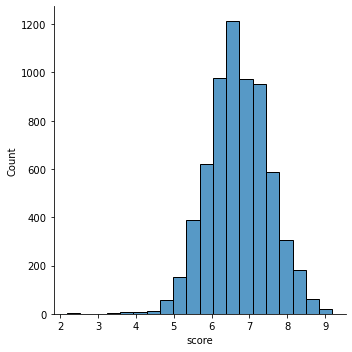

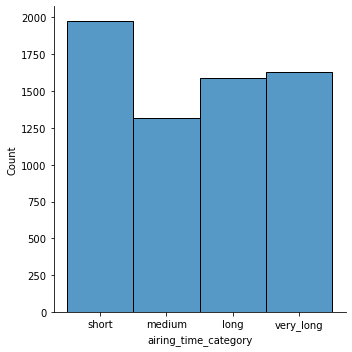

In [52]:
sns.displot(data5_anime_vs_airing['score'], bins=20)
sns.displot(data5_anime_vs_airing['airing_time_category'], bins=20)



In [53]:
data5_anime_vs_airing_very_long = data5_anime_vs_airing[data5_anime_vs_airing['airing_time_category']=='very_long']
data5_anime_vs_airing_very_long 

,mal_id,name,score,popularity,episodes,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time,airing_time_category
0,1,Cowboy Bebop,8.78,39,26,1998-04-03,1999-04-24,1998,1999,386 days,very_long
4,8,Bouken Ou Beet,6.98,4369,52,2004-09-30,2005-09-29,2004,2005,364 days,very_long
5,15,Eyeshield 21,7.95,1003,145,2005-04-06,2008-03-19,2005,2008,1078 days,very_long
7,17,Hungry Heart: Wild Striker,7.59,3612,52,2002-09-11,2003-09-10,2002,2003,364 days,very_long
8,18,Initial D Fourth Stage,8.15,1233,24,2004-04-17,2006-02-18,2004,2006,672 days,very_long
...,...,...,...,...,...,...,...,...,...,...,...
17178,42941,Uma Musume: Pretty Derby (TV) Season 2,7.21,4075,13,2021-01-05,2022-05-30,2021,2022,510 days,very_long
17224,43299,Wonder Egg Priority,8.32,664,12,2021-01-13,2022-05-30,2021,2022,502 days,very_long
17359,44193,Ano Ko no Kawari ni Suki na Dake,5.91,10274,2,2020-12-18,2022-05-30,2020,2022,528 days,very_long
17368,44218,Tunshi Xingkong,6.97,11288,26,2020-11-29,2022-05-30,2020,2022,547 days,very_long


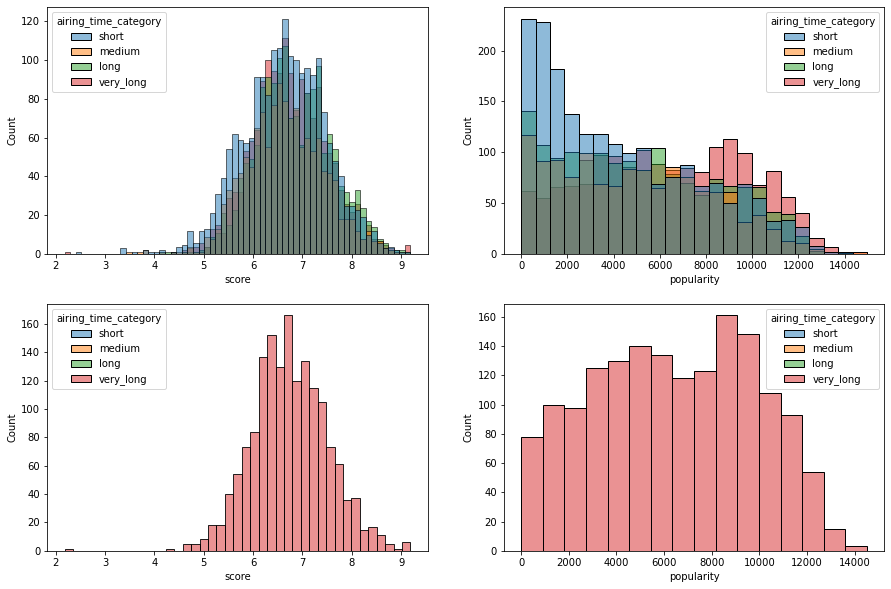

In [54]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.histplot(x='score', hue='airing_time_category', data=data5_anime_vs_airing, ax=ax[0,0])
sns.histplot(x='popularity', hue='airing_time_category', data=data5_anime_vs_airing, ax=ax[0,1])
sns.histplot(x='score', hue='airing_time_category', data=data5_anime_vs_airing_very_long, ax=ax[1,0])
sns.histplot(x='popularity', hue='airing_time_category', data=data5_anime_vs_airing_very_long, ax=ax[1,1])
plt.show()
# It appears that the most popular and scored are the very long, also the short ones are the lass popular. bit Not the less scored. 

In [55]:
# it´s independed by the lenght 

In [56]:
sns.histplot(x='score', hue='episodes', data=data5_anime_vs_airing, ax=ax[0,0])

#sns.histplot(x='popularity', hue='episodes', data=data5_anime_vs_airing, ax=ax[0,1])

<AxesSubplot:xlabel='score', ylabel='Count'>

In [57]:
data5.head()

,mal_id,name,score,genres,english_name,type,episodes,premiered,producers,licensors,...,completed,on-hold,dropped,plan_to_watch,airedUnknown,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",...,718161,71513,26678,329800,False,1998-04-03,1999-04-24,1998,1999,386 days
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",...,343492,25465,13925,146918,False,1998-04-01,1998-09-30,1998,1998,182 days
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",...,46165,5121,5378,33719,False,2002-07-02,2002-12-24,2002,2002,175 days
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Fall 2004,"TV Tokyo, Dentsu",Unknown,...,7314,766,1108,3394,False,2004-09-30,2005-09-29,2004,2005,364 days
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,TV,145,Spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",...,78349,14228,11573,30202,False,2005-04-06,2008-03-19,2005,2008,1078 days


In [58]:
data5['score'] = pd.to_numeric(data5['score'])
print(data5.dtypes)

mal_id                     int64
name                      object
score                    float64
genres                    object
english_name              object
type                      object
episodes                   int64
premiered                 object
producers                 object
licensors                 object
studios                   object
source                    object
duration                  object
rating                    object
ranked                    object
popularity                 int64
members                    int64
favorites                  int64
watching                   int64
completed                  int64
on-hold                    int64
dropped                    int64
plan_to_watch              int64
airedUnknown                bool
aired_start       datetime64[ns]
aired_stop        datetime64[ns]
aired_start_y              int64
aired_stop_y               int64
airing_time      timedelta64[ns]
dtype: object


In [59]:
data5[['type']].value_counts()

type   
TV         3783
OVA        1627
ONA         549
Special     521
Movie        19
Music        11
dtype: int64

In [60]:
data_movies =data5[data5['type']== "Movie"] 

In [61]:
data_movies.head()

,mal_id,name,score,genres,english_name,type,episodes,premiered,producers,licensors,...,completed,on-hold,dropped,plan_to_watch,airedUnknown,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time
2397,2611,Panda Kopanda,6.76,"Comedy, Kids",Panda! Go Panda!,Movie,2,Unknown,Unknown,"Discotek Media, Geneon Entertainment USA",...,5691,101,130,2179,False,1972-12-17,1973-03-17,1972,1973,90 days
2515,2733,MiniPato,6.44,Parody,Mobile Police Patlabor Minimum,Movie,3,Unknown,"Bandai Visual, Tohokushinsha Film Corporation","Maiden Japan, Geneon Entertainment USA",...,1490,61,66,1072,False,2002-03-30,2002-04-13,2002,2002,14 days
4498,6189,Baton,5.80,"Adventure, Sci-Fi",Unknown,Movie,3,Unknown,Unknown,Unknown,...,863,45,85,1054,False,2009-04-28,2009-09-27,2009,2009,152 days
5088,7616,Michi (Movie),7.02,"Slice of Life, Drama",Unknown,Movie,4,Unknown,Tomoyasu Murata Company,Unknown,...,189,14,35,299,False,2002-01-01,2008-01-01,2002,2008,2191 days
5093,7626,Umi no Triton (1979),6.15,"Adventure, Fantasy, Shounen",Triton of the Sea (1979),Movie,2,Unknown,Tohokushinsha Film Corporation,Unknown,...,223,15,56,210,False,1979-04-04,1984-05-21,1979,1984,1874 days


In [62]:
data_movies_drop=data_movies.drop(columns=['airedUnknown', 'source', 'licensors','premiered','english_name', 'on-hold'], axis=1)
display(data_movies_drop.head())
data_movies_drop.shape

,mal_id,name,score,genres,type,episodes,producers,studios,duration,rating,...,favorites,watching,completed,dropped,plan_to_watch,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time
2397,2611,Panda Kopanda,6.76,"Comedy, Kids",Movie,2,Unknown,Tokyo Movie Shinsha,36 min. per ep.,PG - Children,...,20,156,5691,130,2179,1972-12-17,1973-03-17,1972,1973,90 days
2515,2733,MiniPato,6.44,Parody,Movie,3,"Bandai Visual, Tohokushinsha Film Corporation",Production I.G,10 min. per ep.,PG - Children,...,4,47,1490,66,1072,2002-03-30,2002-04-13,2002,2002,14 days
4498,6189,Baton,5.80,"Adventure, Sci-Fi",Movie,3,Unknown,Unknown,20 min. per ep.,PG-13 - Teens 13 or older,...,0,84,863,85,1054,2009-04-28,2009-09-27,2009,2009,152 days
5088,7616,Michi (Movie),7.02,"Slice of Life, Drama",Movie,4,Tomoyasu Murata Company,Unknown,13 min. per ep.,G - All Ages,...,4,16,189,35,299,2002-01-01,2008-01-01,2002,2008,2191 days
5093,7626,Umi no Triton (1979),6.15,"Adventure, Fantasy, Shounen",Movie,2,Tohokushinsha Film Corporation,Unknown,1 hr. 14 min. per ep.,G - All Ages,...,0,20,223,56,210,1979-04-04,1984-05-21,1979,1984,1874 days


(19, 23)

In [63]:
data_movies_drop.columns

Index(['mal_id', 'name', 'score', 'genres', 'type', 'episodes', 'producers',
       'studios', 'duration', 'rating', 'ranked', 'popularity', 'members',
       'favorites', 'watching', 'completed', 'dropped', 'plan_to_watch',
       'aired_start', 'aired_stop', 'aired_start_y', 'aired_stop_y',
       'airing_time'],
      dtype='object')

In [64]:
data_movies_drop['studios'].value_counts()

Unknown                8
Sunrise                2
ufotable               2
Tokyo Movie Shinsha    1
Production I.G         1
Gathering              1
W-Toon Studio          1
GoHands                1
Asahi Production       1
Kinema Citrus          1
Name: studios, dtype: int64

In [65]:
data_movies_drop['producers'].value_counts()

Unknown                                          10
Bandai Visual, Tohokushinsha Film Corporation     1
Tomoyasu Murata Company                           1
Tohokushinsha Film Corporation                    1
CoMix Wave Films                                  1
Aniplex                                           1
Bandai Visual                                     1
Nippon Television Network                         1
Toho                                              1
Delfi Sound                                       1
Name: producers, dtype: int64

In [66]:
#since so many Unknown in droducers I drop it
data_movies_drop=data_movies_drop.drop(columns=['producers'], axis=1)
display(data_movies_drop.head())
data_movies_drop.shape

,mal_id,name,score,genres,type,episodes,studios,duration,rating,ranked,...,favorites,watching,completed,dropped,plan_to_watch,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time
2397,2611,Panda Kopanda,6.76,"Comedy, Kids",Movie,2,Tokyo Movie Shinsha,36 min. per ep.,PG - Children,4641.0,...,20,156,5691,130,2179,1972-12-17,1973-03-17,1972,1973,90 days
2515,2733,MiniPato,6.44,Parody,Movie,3,Production I.G,10 min. per ep.,PG - Children,6224.0,...,4,47,1490,66,1072,2002-03-30,2002-04-13,2002,2002,14 days
4498,6189,Baton,5.80,"Adventure, Sci-Fi",Movie,3,Unknown,20 min. per ep.,PG-13 - Teens 13 or older,8838.0,...,0,84,863,85,1054,2009-04-28,2009-09-27,2009,2009,152 days
5088,7616,Michi (Movie),7.02,"Slice of Life, Drama",Movie,4,Unknown,13 min. per ep.,G - All Ages,3577.0,...,4,16,189,35,299,2002-01-01,2008-01-01,2002,2008,2191 days
5093,7626,Umi no Triton (1979),6.15,"Adventure, Fantasy, Shounen",Movie,2,Unknown,1 hr. 14 min. per ep.,G - All Ages,7569.0,...,0,20,223,56,210,1979-04-04,1984-05-21,1979,1984,1874 days


(19, 22)

In [67]:
Top_scored_movies= data_movies_drop.sort_values(by=['score'], ascending = False)
Top_scored_movies[['name']]
Top_scored_movies = Top_scored_movies.iloc[[0,1,2,3,4],:]
Top_scored_movies
Top_scored_movies[['name','score','completed','dropped','favorites']]

,name,score,completed,dropped,favorites
5088,Michi (Movie),7.02,189,35,4
16423,Marulk-chan no Nichijou,6.77,5260,145,8
2397,Panda Kopanda,6.76,5691,130,20
2515,MiniPato,6.44,1490,66,4
8990,Kara no Kyoukai: Manner Movies,6.41,6620,195,24


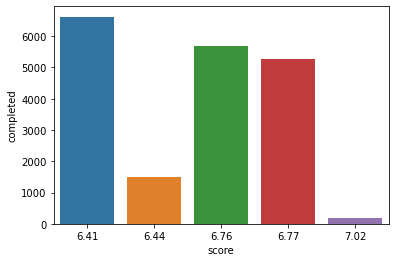

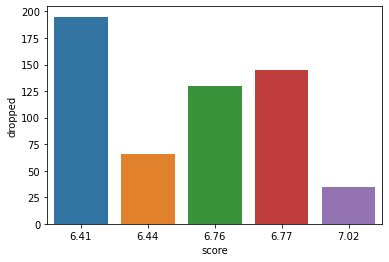

In [68]:
sns.barplot(x="score", y="completed", data=Top_scored_movies)
plt.show()
sns.barplot(x="score", y="dropped", data=Top_scored_movies)
plt.show()
#scored anime top5 according to the number of users that finished it 

In [69]:
Top_scored_movies= data_movies_drop.sort_values(by=['popularity'], ascending = False)
Top_scored_movies[['popularity']]
Top_scored_movies = Top_scored_movies.iloc[[0,1,2,3,4],:]
Top_scored_movies
Top_scored_movies[['name','score', 'completed']]

,name,score,completed
8756,Peeping Life: Gekijou Original-ban,5.52,158
5093,Umi no Triton (1979),6.15,223
5088,Michi (Movie),7.02,189
11486,Pepsi Nex x 009 Re:Cyborg,5.44,299
7647,Imokawa Mukuzo: Genkanban no Maki,5.38,334


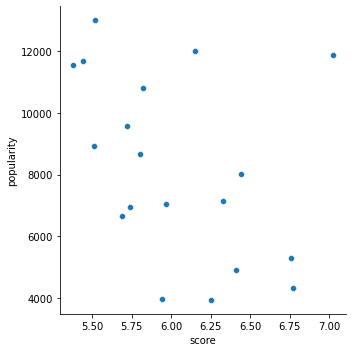

In [70]:
sns.relplot(data=data_movies_drop, x="score", y="popularity")

array([ 5297,  8034,  8652, 11864, 12021,  9568, 11543,  7042,  3972,
       12998,  4913,  6966, 10822,  7137, 11669,  8929,  6674,  3943,
        4330])

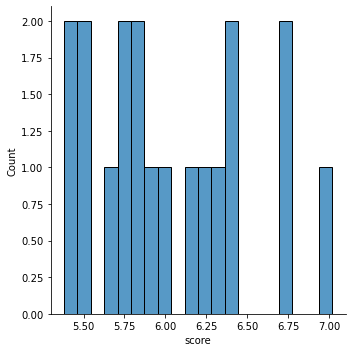

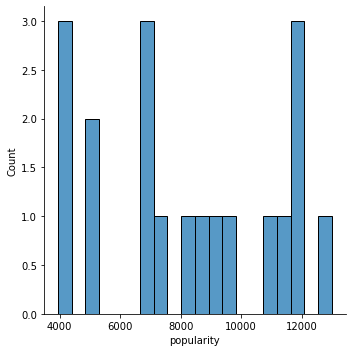

In [71]:
sns.displot(data_movies_drop['score'], bins=20)
sns.displot(data_movies_drop['popularity'], bins=20)
data_movies_drop['score'].unique()
data_movies_drop['popularity'].unique()

In [72]:
# studios that are most successfull --> filter
# model to predict the most succesfull studios? 
# anime raccomandation?
# predict the anime that can be likely that is higher scored or popular? 

In [73]:
#SPLIT genres

In [74]:
# new data frame with split value columns
new = data_movies_drop["genres"].str.split(",", n = -1, expand = True)
# making separate first name column from new data frame
data_movies_drop['genres1']= new[0]
# making separate last name column from new data frame
data_movies_drop["genres2"]= new[1]
data_movies_drop["genres3"]= new[3]

In [75]:
data_movies_drop

,mal_id,name,score,genres,type,episodes,studios,duration,rating,ranked,...,dropped,plan_to_watch,aired_start,aired_stop,aired_start_y,aired_stop_y,airing_time,genres1,genres2,genres3
2397,2611,Panda Kopanda,6.76,"Comedy, Kids",Movie,2,Tokyo Movie Shinsha,36 min. per ep.,PG - Children,4641.0,...,130,2179,1972-12-17,1973-03-17,1972,1973,90 days,Comedy,Kids,None
2515,2733,MiniPato,6.44,Parody,Movie,3,Production I.G,10 min. per ep.,PG - Children,6224.0,...,66,1072,2002-03-30,2002-04-13,2002,2002,14 days,Parody,None,None
4498,6189,Baton,5.80,"Adventure, Sci-Fi",Movie,3,Unknown,20 min. per ep.,PG-13 - Teens 13 or older,8838.0,...,85,1054,2009-04-28,2009-09-27,2009,2009,152 days,Adventure,Sci-Fi,None
5088,7616,Michi (Movie),7.02,"Slice of Life, Drama",Movie,4,Unknown,13 min. per ep.,G - All Ages,3577.0,...,35,299,2002-01-01,2008-01-01,2002,2008,2191 days,Slice of Life,Drama,None
5093,7626,Umi no Triton (1979),6.15,"Adventure, Fantasy, Shounen",Movie,2,Unknown,1 hr. 14 min. per ep.,G - All Ages,7569.0,...,56,210,1979-04-04,1984-05-21,1979,1984,1874 days,Adventure,Fantasy,None
5635,9087,"Mobile Suit SD Gundam Musha, Knight, Commando",5.72,"Action, Comedy, Parody, Fantasy, Mecha",Movie,2,Sunrise,15 min. per ep.,PG - Children,9105.0,...,92,725,1991-03-16,1991-08-22,1991,1991,159 days,Action,Comedy,Fantasy
7647,17387,Imokawa Mukuzo: Genkanban no Maki,5.38,Comedy,Movie,1,Unknown,5 min.,G - All Ages,9981.0,...,89,172,1917-01-01,2022-05-30,1917,2022,38500 days,Comedy,None,None
7954,18755,Donyatsu,5.97,"Comedy, Sci-Fi, Seinen",Movie,12,Gathering,2 min. per ep.,G - All Ages,8339.0,...,206,1073,2013-06-01,2013-12-20,2013,2013,202 days,Comedy,Sci-Fi,None
8023,19165,Fate/Zero Cafe,5.94,"Comedy, Parody",Movie,2,ufotable,10 min. per ep.,G - All Ages,8416.0,...,425,10080,2013-07-13,2016-03-19,2013,2016,980 days,Comedy,Parody,None
8756,22675,Peeping Life: Gekijou Original-ban,5.52,"Comedy, Slice of Life",Movie,5,Unknown,1 min. per ep.,PG - Children,9642.0,...,50,119,2009-12-01,2010-02-05,2009,2010,66 days,Comedy,Slice of Life,None


In [76]:
data_movies_drop['genres1'].value_counts()

Comedy           9
Adventure        3
Action           3
Slice of Life    2
Parody           1
Music            1
Name: genres1, dtype: int64

In [77]:
data_movies_drop_sel= data_movies_drop[(data_movies_drop['genres1']=='Comedy') or (data_movies_drop['genres2']=='Comedy')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
data_movies_drop_sel